In [1]:
# Importing Libraries
import ast
import pandas as pd
import seaborn as sns
from datasets import load_dataset
import matplotlib.pyplot as plt

# Loading Data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# Data Cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(
    lambda x: ast.literal_eval(x) if pd.notna(x) else x)

In [2]:
df_MAS = df[(df['job_country'] == 'Malaysia')].dropna(subset=['salary_year_avg'])

In [6]:
job_titles = df_MAS['job_title_short'].value_counts().index[:5].tolist()

In [36]:
df_MAS_top5 = df_MAS[df_MAS['job_title_short'].isin(job_titles)]
df_MAS_top5

,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills
7931,Data Analyst,Investments Data Analyst,"Kuala Lumpur, Federal Territory of Kuala Lumpu...",via Ai-Jobs.net,Full-time,False,Malaysia,2023-02-07 13:19:23,False,False,Malaysia,year,51014.0,NaN,500 Global,"[python, r, sql, tableau]","{'analyst_tools': ['tableau'], 'programming': ..."
8643,Senior Data Engineer,"Senior Engineer, Data Analytics",Malaysia,via Ai-Jobs.net,Full-time,False,Malaysia,2023-02-10 14:22:12,False,False,Malaysia,year,79200.0,NaN,Western Digital,"[python, c#, sql, assembly]","{'programming': ['python', 'c#', 'sql', 'assem..."
12462,Data Scientist,"Scientist 2, Data Science","Petaling Jaya, Selangor, Malaysia",via Ai-Jobs.net,Full-time,False,Malaysia,2023-05-26 13:17:06,False,False,Malaysia,year,50400.0,NaN,Western Digital,"[python, sas, sas, javascript, aws, redshift, ...","{'analyst_tools': ['sas', 'spss'], 'cloud': ['..."
15296,Data Scientist,"Scientist 1, Data Science",Malaysia,via Ai-Jobs.net,Full-time,False,Malaysia,2023-01-05 13:43:52,False,False,Malaysia,year,50400.0,NaN,Western Digital,"[sql, javascript, python, r, java, matlab, aws...","{'cloud': ['aws'], 'libraries': ['hadoop'], 'o..."
21523,Data Analyst,"Data Analyst (Customer Service Industry, Manda...",Malaysia,via Ai-Jobs.net,Full-time,False,Malaysia,2023-06-15 13:31:41,False,False,Malaysia,year,111175.0,NaN,OKX,"[tableau, excel, flow]","{'analyst_tools': ['tableau', 'excel'], 'other..."
22043,Data Analyst,Junior Data Analyst,"Kuala Lumpur, Federal Territory of Kuala Lumpu...",via Ai-Jobs.net,Full-time,False,Malaysia,2023-03-08 13:53:25,True,False,Malaysia,year,53014.0,NaN,Carousell Group,"[sql, python, looker, tableau]","{'analyst_tools': ['looker', 'tableau'], 'prog..."
33697,Data Analyst,Risk Data Analyst,"Kuala Lumpur, Federal Territory of Kuala Lumpu...",via Ai-Jobs.net,Full-time,False,Malaysia,2023-06-19 13:32:57,False,False,Malaysia,year,79200.0,NaN,Lalamove,"[sql, python, php, perl, looker, tableau]","{'analyst_tools': ['looker', 'tableau'], 'prog..."
72574,Senior Data Analyst,Cloud Senior Data Analyst Engineer,"Kuala Lumpur, Federal Territory of Kuala Lumpu...",via Ai-Jobs.net,Full-time,False,Malaysia,2023-04-15 00:56:18,False,False,Malaysia,year,111175.0,NaN,Unit4,[azure],{'cloud': ['azure']}
79089,Senior Data Engineer,Senior Data Engineer - Data lakehouse,"Kuala Lumpur, Federal Territory of Kuala Lumpu...",via Ai-Jobs.net,Full-time,False,Malaysia,2023-03-07 01:22:13,False,False,Malaysia,year,147500.0,NaN,Xendit,"[python, go, sql, mongodb, mongodb, databricks...","{'analyst_tools': ['looker'], 'cloud': ['datab..."
129939,Data Analyst,Cloud Data Analyst Engineer (FinOps),"Kuala Lumpur, Federal Territory of Kuala Lumpu...",via Ai-Jobs.net,Full-time,False,Malaysia,2023-06-15 08:31:41,False,False,Malaysia,year,111175.0,NaN,Unit4,"[azure, excel]","{'analyst_tools': ['excel'], 'cloud': ['azure']}"


In [33]:
df_order = df_MAS_top5.groupby('job_title_short')['salary_year_avg'].median().sort_values(ascending=False).index
df_order

Index(['Data Engineer', 'Senior Data Analyst', 'Data Analyst',
       'Senior Data Engineer', 'Data Scientist'],
      dtype='object', name='job_title_short')

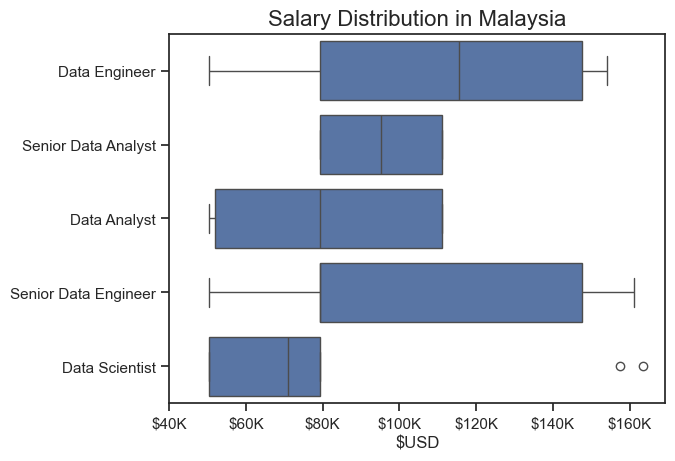

In [34]:
sns.boxplot(data=df_MAS_top5, x='salary_year_avg', y='job_title_short', order=df_order)
sns.set_theme(style='ticks')

plt.title('Salary Distribution in Malaysia', fontsize=16)
plt.ylabel('')
plt.xlabel('$USD')
plt.xlim(40000,)

ticks_x = plt.FuncFormatter(lambda y, pos: f'${int(y/1000)}K')
plt.gca().xaxis.set_major_formatter(ticks_x)

plt.show()

In [41]:
df_DA_MAS = df[(df['job_title_short'] == 'Data Analyst') & (df['job_country'] == 'Malaysia')]

df_DA_MAS = df_DA_MAS.dropna(subset=['salary_year_avg'])

In [43]:
df_DA_MAS = df_DA_MAS.explode('job_skills')

In [61]:
df_DA_MAS_top_pay = df_DA_MAS.groupby('job_skills')['salary_year_avg'].agg(['count', 'median']).sort_values(by='median', ascending=False).head(10)

In [55]:
df_DA_MAS_top_skills = df_DA_MAS.groupby('job_skills')['salary_year_avg'].agg(['count', 'median']).sort_values(by='count', ascending=False)

In [59]:
df_DA_MAS_top_skills = df_DA_MAS_top_skills.head(10).sort_values(by='median', ascending=False)

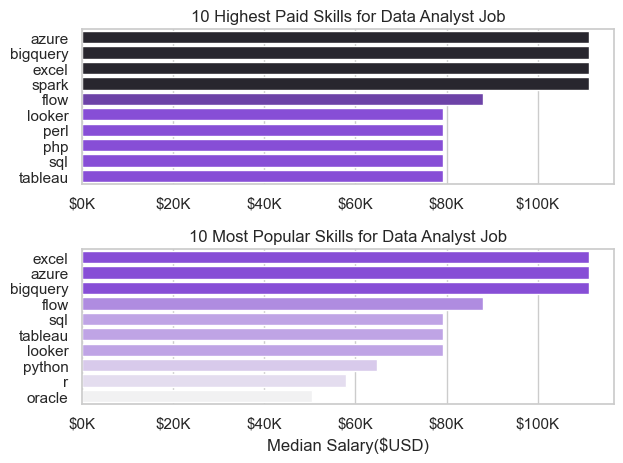

In [62]:
fig, ax = plt.subplots(2, 1)

sns.set_theme(style='whitegrid')
sns.barplot(data=df_DA_MAS_top_pay, x='median', y=df_DA_MAS_top_pay.index, ax=ax[0], hue='median', palette='dark:#8338ec_r', legend=False)
# df_top_pay[::-1].plot(kind='barh', y='median', ax=ax[0], legend=False)
ax[0].set_title('10 Highest Paid Skills for Data Analyst Job')
ax[0].set_ylabel('')
ax[0].set_xlabel('')
ax[0].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos: f'${int(x/1000)}K'))

sns.barplot(data=df_DA_MAS_top_skills, x='median', y=df_DA_MAS_top_skills.index, ax=ax[1], hue='median', palette='light:#8338ec', legend=False)
# df_top_count[::-1].plot(kind='barh', y='median', ax=ax[1], legend=False)
ax[1].set_title('10 Most Popular Skills for Data Analyst Job')
ax[1].set_ylabel('')
ax[1].set_xlabel('Median Salary($USD)')
ax[1].set_xlim(ax[0].get_xlim())
ax[1].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos: f'${int(x/1000)}K'))

plt.tight_layout()
plt.show()